In [89]:
import os
import pandas as pd
from mutagen.easyid3 import EasyID3
from mutagen.mp4 import MP4
from mutagen.flac import FLAC
import matplotlib.pyplot as plt

In [103]:
dlist = list()  #make a list to store the data

directory = "D:\Music\mp3" # Set the path to the directory containing your MP3 files
for filename in os.listdir(directory): # Loop over each MP3 file in the directory
    if filename.endswith(".mp3"):

        mp3_path = os.path.join(directory, filename)  # Set the path to the MP3 file

        audio = EasyID3(mp3_path) # Load the MP3 file using the EasyID3 module of mutagen

        # Get the metadata
        title = audio.get("title", [""])[0]
        artist = audio.get("artist", [""])[0]
        album = audio.get("album", [""])[0]
        year = audio.get("date", [""])[0]
        genre = audio.get("genre", [""])[0]

        dlist.append((title, artist, album, genre, year))
        metadata_df = pd.DataFrame(dlist, columns=["Title", "Artist", "Album", "Genre", "Year"])
        

In [104]:
metadata_df
metadata_df.to_csv('new one.csv', index=False)

ddf = pd.read_csv('new one.csv')
ddf = ddf.dropna()
ddf.to_csv('my_data_cleaned.csv', index=False)
data = pd.read_csv('my_data_cleaned.csv')
data.head()

,Title,Artist,Album,Genre,Year
0,Alone Again,The Weeknd,After Hours (Deluxe),R&B,2020-03-23
1,Symphony (feat. Zara Larsson),"Clean Bandit, Zara Larsson",What Is Love? (Deluxe),Electro,2018
2,馬と鹿,米津玄師,馬と鹿,JPop,2019
3,Don't Leave Me Alone (feat. Anne-Marie),David Guetta,7,"Dance, Club, Pop, RnB",2018
4,Lose Yourself,Eminem,8 Mile (Music from and Inspired By the Motion...,Soundtrack,2002


### Ploting a bar chart to get the most song by top 15 Artist in my playlist

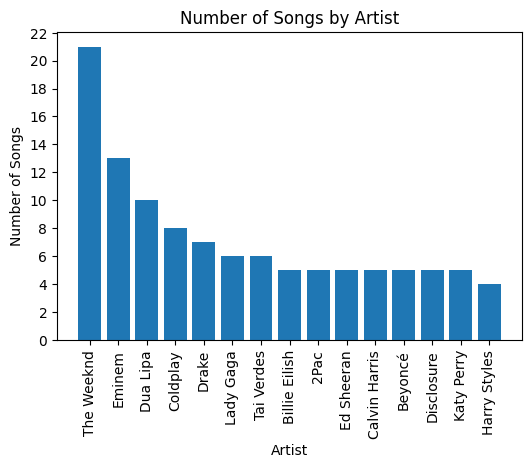

In [102]:
#selecting the top 15 artists
artist_counts = data['Artist'].value_counts().nlargest(15)
# plotting the bar graph
plt.figure(figsize=(6,4))
plt.bar(artist_counts.index, artist_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Artist')
plt.yticks(range(0,artist_counts.max()+2, 2))
plt.show()

##### well who dosen't like The weeknd...
##### but my favorite is eminem and dua lipa

### Plotting a stackplot for the top Genres in the playlist

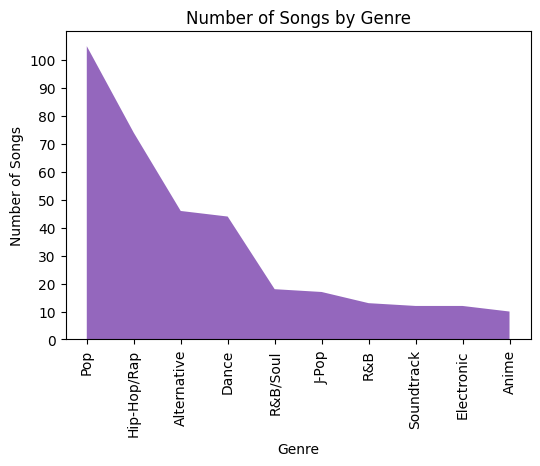

In [93]:
Genre_counts = data['Genre'].value_counts().nlargest(10)
# plotting the stackplot
colors = ['tab:purple']
plt.figure(figsize=(6,4))
plt.stackplot(Genre_counts.index, Genre_counts.values, colors=colors)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Genre')
plt.yticks(range(0,Genre_counts.max()+2, 10))
plt.show()

##### because pop is much easy to sing along to..